In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="https://drive.google.com/file/d/1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y/view?usp=drive_link"
url="https://drive.google.com/uc?id="+ url.split("/")[-2]
df=pd.read_csv(url)

Task 1: Restaurant Rating

Analyze the distribution of aggregate ratings and determine the most common rating range.

In [2]:
agg_rating_distribution=df['Aggregate rating'].value_counts()
print(agg_rating_distribution)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [3]:
print("Most common rating range is ",agg_rating_distribution. idxmax())

Most common rating range is  0.0


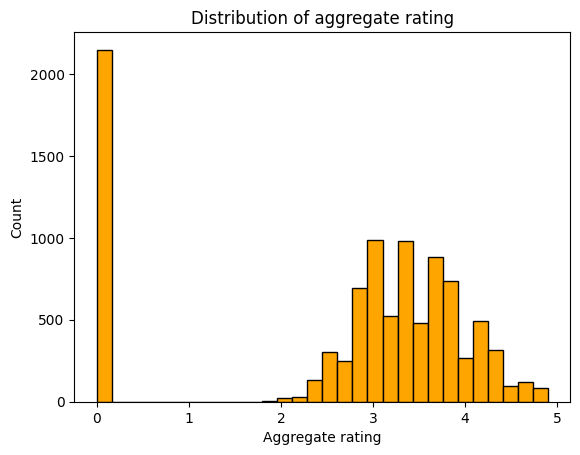

In [5]:
plt.hist(df['Aggregate rating'], bins=30, color='orange', edgecolor='black')
plt.xlabel("Aggregate rating")
plt.ylabel("Count")
plt.title("Distribution of aggregate rating")
plt.show()

Calculate the average number of votes received by restaurants.

In [7]:
avg_vote= round(df['Votes'].mean(),3)
print("The average number of votes releived by restaurants : ",avg_vote)

The average number of votes releived by restaurants :  156.91


Task2: Cuisine Combination

Identify the most common combinations of cuisines in the dataset.

In [11]:
common_combinations=df.groupby('Cuisines')['Aggregate rating'].mean().sort_values (ascending=False)
print("Top 10 most common combinations are : ",common_combinations.head(18))

Top 10 most common combinations are :  Cuisines
Italian, Deli                      4.9
Hawaiian, Seafood                  4.9
American, Sandwich, Tea            4.9
Continental, Indian                4.9
European, Asian, Indian            4.9
European, Contemporary             4.9
European, German                   4.9
BBQ, Breakfast, Southern           4.9
American, Coffee and Tea           4.9
Sunda, Indonesian                  4.9
American, Burger, Grill            4.9
Mughlai, Lucknowi                  4.9
Mexican, American, Healthy Food    4.9
American, Caribbean, Seafood       4.9
Burger, Bar Food, Steak            4.9
Italian, Bakery, Continental       4.9
World Cuisine                      4.9
American, BBQ, Sandwich            4.9
Name: Aggregate rating, dtype: float64


Determine if certain cuisine combinations tend to have higher ratings.

In [14]:
max_rating =common_combinations.iloc[0]
print("The Max Rating is: ",max_rating)
max_rated_rest =df.loc[df['Aggregate rating'] == max_rating]
print("Restaurants having the maximum rating: ",max_rated_rest['Restaurant Name'])

The Max Rating is:  4.9
Restaurants having the maximum rating:  3                                           Ooma
8       Spiral - Sofitel Philippine Plaza Manila
10                              Silantro Fil-Mex
39                                    Coco Bambu
48                            Braseiro da G��vea
                          ...                   
9484              Restaurant Mosaic @ The Orient
9514                            Ministry of Crab
9524                                Gaga Manjero
9538                                   Starbucks
9540                            Draft Gastro Pub
Name: Restaurant Name, Length: 61, dtype: object


Task3: Geographic Analysis

Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [19]:
import geopandas
from geodatasets import get_path
import folium
from folium.plugins import HeatMap

In [20]:
print (df[["Longitude", "Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [24]:
gdf =geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df. Latitude), crs="EPSG:4326")
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

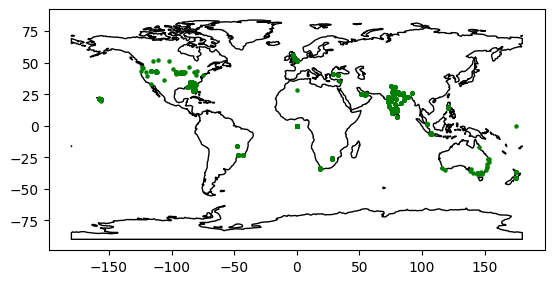

In [28]:
world=geopandas.read_file(get_path("naturalearth.land"))
ax=world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='green', markersize=5)
plt.show()

Identify any patterns or clusters of restaurants in specific areas.

In [30]:
world_map=folium.Map(location=[df['Latitude'].mean(), df ['Longitude'].mean()], zoom_start=1, height='100%', width = '100%')
heat_marker =[[row['Latitude'], row['Longitude']] for i, row in df.iterrows()]
HeatMap(heat_marker, radius=10).add_to(world_map)

In [31]:
world_map

Task4: Restaurant Chains

Identify if there are any restaurant chains present in the dataset.

In [32]:
restaurant_chain= df.groupby("Restaurant Name").size().reset_index(name="OutletCount")
new =restaurant_chain [restaurant_chain[ "OutletCount"] > 1]
restaurant_chains =new.sort_values(by="OutletCount", ascending=False)
print(restaurant_chains[["Restaurant Name", "OutletCount"]].head (10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


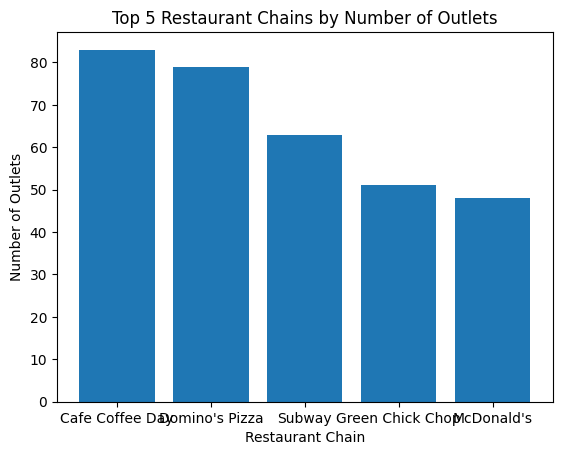

In [33]:
plt.bar(restaurant_chains["Restaurant Name"][:5], restaurant_chains["OutletCount"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

Analyze the ratings and popularity of different retaurant chains.

In [35]:
ratings = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Average Rating").sort_values(by="Average Rating", ascending=False)
print(ratings)

                      Restaurant Name  Average Rating
5322   Restaurant Mosaic @ The Orient             4.9
4177                 Ministry of Crab             4.9
4135                            Miann             4.9
5757          Shorts Burger and Shine             4.9
4165                            Milse             4.9
...                               ...             ...
1105                      Cafe Corner             0.0
4905                  Pheva Tandooris             0.0
4913                     Pick & Carry             0.0
1096                     Cafe Brownie             0.0
2292  Famous Parantha and Poori Sabzi             0.0

[7446 rows x 2 columns]


In [38]:
votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index(name="Total Votes").sort_values(by="Total Votes", ascending=False)
print(votes)

                Restaurant Name  Total Votes
663             Barbeque Nation        28142
101   AB's - Absolute Barbecues        13400
6943                       Toit        10934
785                   Big Chill        10853
2297                 Farzi Cafe        10098
...                         ...          ...
4375                  Muncheezz            0
6217            Swiss Gourmessa            0
2110      Dosa and Pizza Corner            0
6215            Sweets n Treats            0
2433               Food Station            0

[7446 rows x 2 columns]


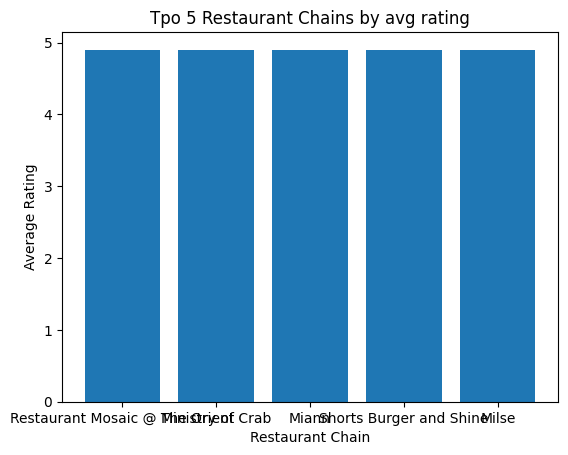

In [39]:
plt.bar(ratings["Restaurant Name"][:5],ratings["Average Rating"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.title("Tpo 5 Restaurant Chains by avg rating")
plt.show()

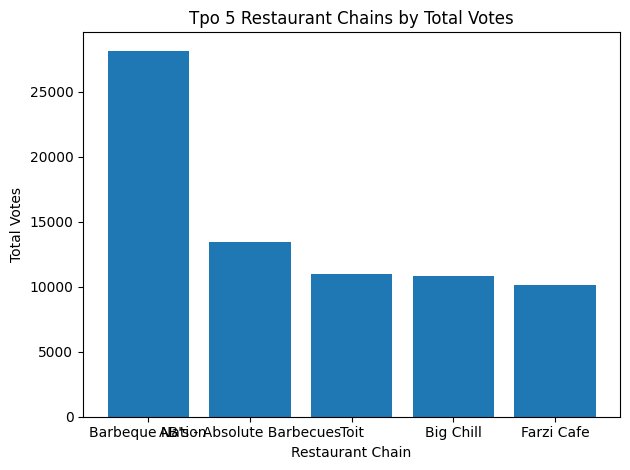

In [40]:
plt.bar(votes["Restaurant Name"][:5],votes["Total Votes"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Tpo 5 Restaurant Chains by Total Votes")
plt.tight_layout()
plt.show()